In [8]:
prices_a = [8.70,8.91,8.71]

In [9]:
8.91/8.7 - 1

0.024137931034482918

In [10]:
8.71/8.91 - 1

-0.022446689113355678

In [11]:
prices_a[1:]

[8.91, 8.71]

In [12]:
prices_a[:-1]

[8.7, 8.91]

In [13]:
prices_a[1:]/prices_a[:-1] - 1

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [ ]:
import numpy as np

In [ ]:
prices_a = np.array([8.70,8.91,8.71])
prices_a

array([8.7 , 8.91, 8.71])

In [ ]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [16]:
import pandas as pd

In [ ]:
prices = pd.DataFrame({"BLUE":[8.70,8.91,8.71,8.43,8.73],
                       "ORANGE":[10.66,11.08,10.71,11.59,12.11]
                       })
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [ ]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [ ]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


As long as one of them does not have an index, there will be no re-alignment of the indices, and we will be able to get the relative return for each period

In [ ]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [ ]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


A more efficient way to do this is:

In [ ]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


pandas dataframes has a method called pct_change, which is an easier way to calculate the returns

In [ ]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [17]:
prices = pd.read_csv('sample_stock_prices.csv')

In [18]:
prices

,BLUE,ORANGE
0,8.700000,10.660000
1,8.716987,10.751757
2,8.752819,10.771060
3,8.726089,10.833917
4,8.704304,11.003694
5,8.865739,10.952392
6,8.969193,10.965050
7,8.993605,11.151718
8,8.839288,10.967549
9,8.669651,11.113470


In [19]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.001953,0.008608
2,0.004111,0.001795
3,-0.003054,0.005836
4,-0.002497,0.015671
5,0.018547,-0.004662
6,0.011669,0.001156
7,0.002722,0.017024
8,-0.017159,-0.016515
9,-0.019191,0.013305


In [23]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c5/d4/f426fa1ca42e47bcfff0c878fa9d49d9c03379d00903a7c178f95b97867a/fonttools-4.51.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 660.6 kB/s e


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

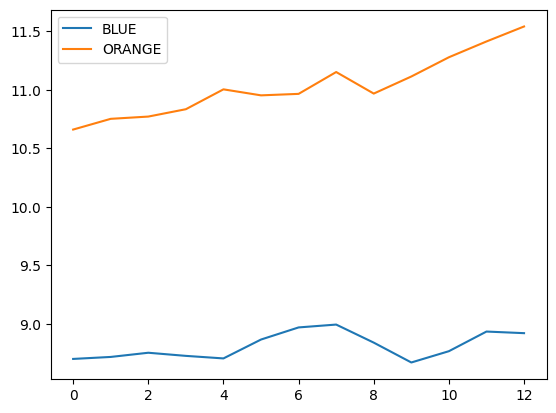

In [24]:
import matplotlib.pyplot as plt
prices.plot()

<Axes: >

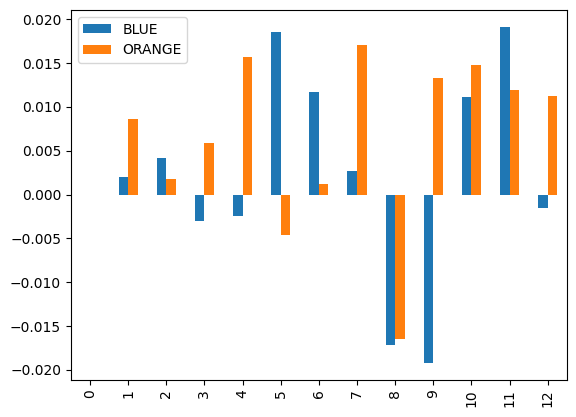

In [25]:
returns.plot.bar()

In [26]:
returns.std()

BLUE      0.012149
ORANGE    0.009870
dtype: float64

In [27]:
returns.mean()

BLUE      0.002153
ORANGE    0.006684
dtype: float64

In [28]:
# to calculate the compounded return for each stock:
(returns+1).prod() - 1

BLUE      0.025307
ORANGE    0.082643
dtype: float64

In [29]:
#To get percentages rounded up:
(((returns+1).prod() - 1)*100).round(2)

BLUE      2.53
ORANGE    8.26
dtype: float64

## Annualisation

In [30]:
# Example
r_m = 0.01 # monthly return
# annualised return is:
((1+r_m)**12) - 1 #exponential power is denoted by two asterisks in python

0.12682503013196977